# Viewer

## Get File List

In [2]:
from utils.get_file_names import get_file_names
from project_config import (
    ITERATE_1_ANTHROPIC_DIR,
    SIMILARITY_METRICS_ITERATE_1_ANTHROPIC_DIR,
)

files_dir = SIMILARITY_METRICS_ITERATE_1_ANTHROPIC_DIR

file_list = get_file_names(files_dir, True)
file_list

['C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Adobe_Sr__Director__Applied_AI_ML__Discovery__sim_metrics_iter1.csv',
 'C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Airtable_Product_Manager__AI_sim_metrics_iter1.csv',
 'C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Amazon_Product_Manager__Artificial_General_Intelligence_-_Data_Services_sim_metrics_iter1.csv',
 'C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Amazon_Research_Manager_-_Strategy_and_Insights_GCA_Marketing_sim_metrics_iter1.csv',
 'C:\\github\\job_bot\\input_output\\evaluation_optimization\\evaluation_optimization_by_anthropic\\iteration_1\\similarity_metrics\\Amazon_Sr__Generative_AI_Strat

## Cross Tab Heatmap

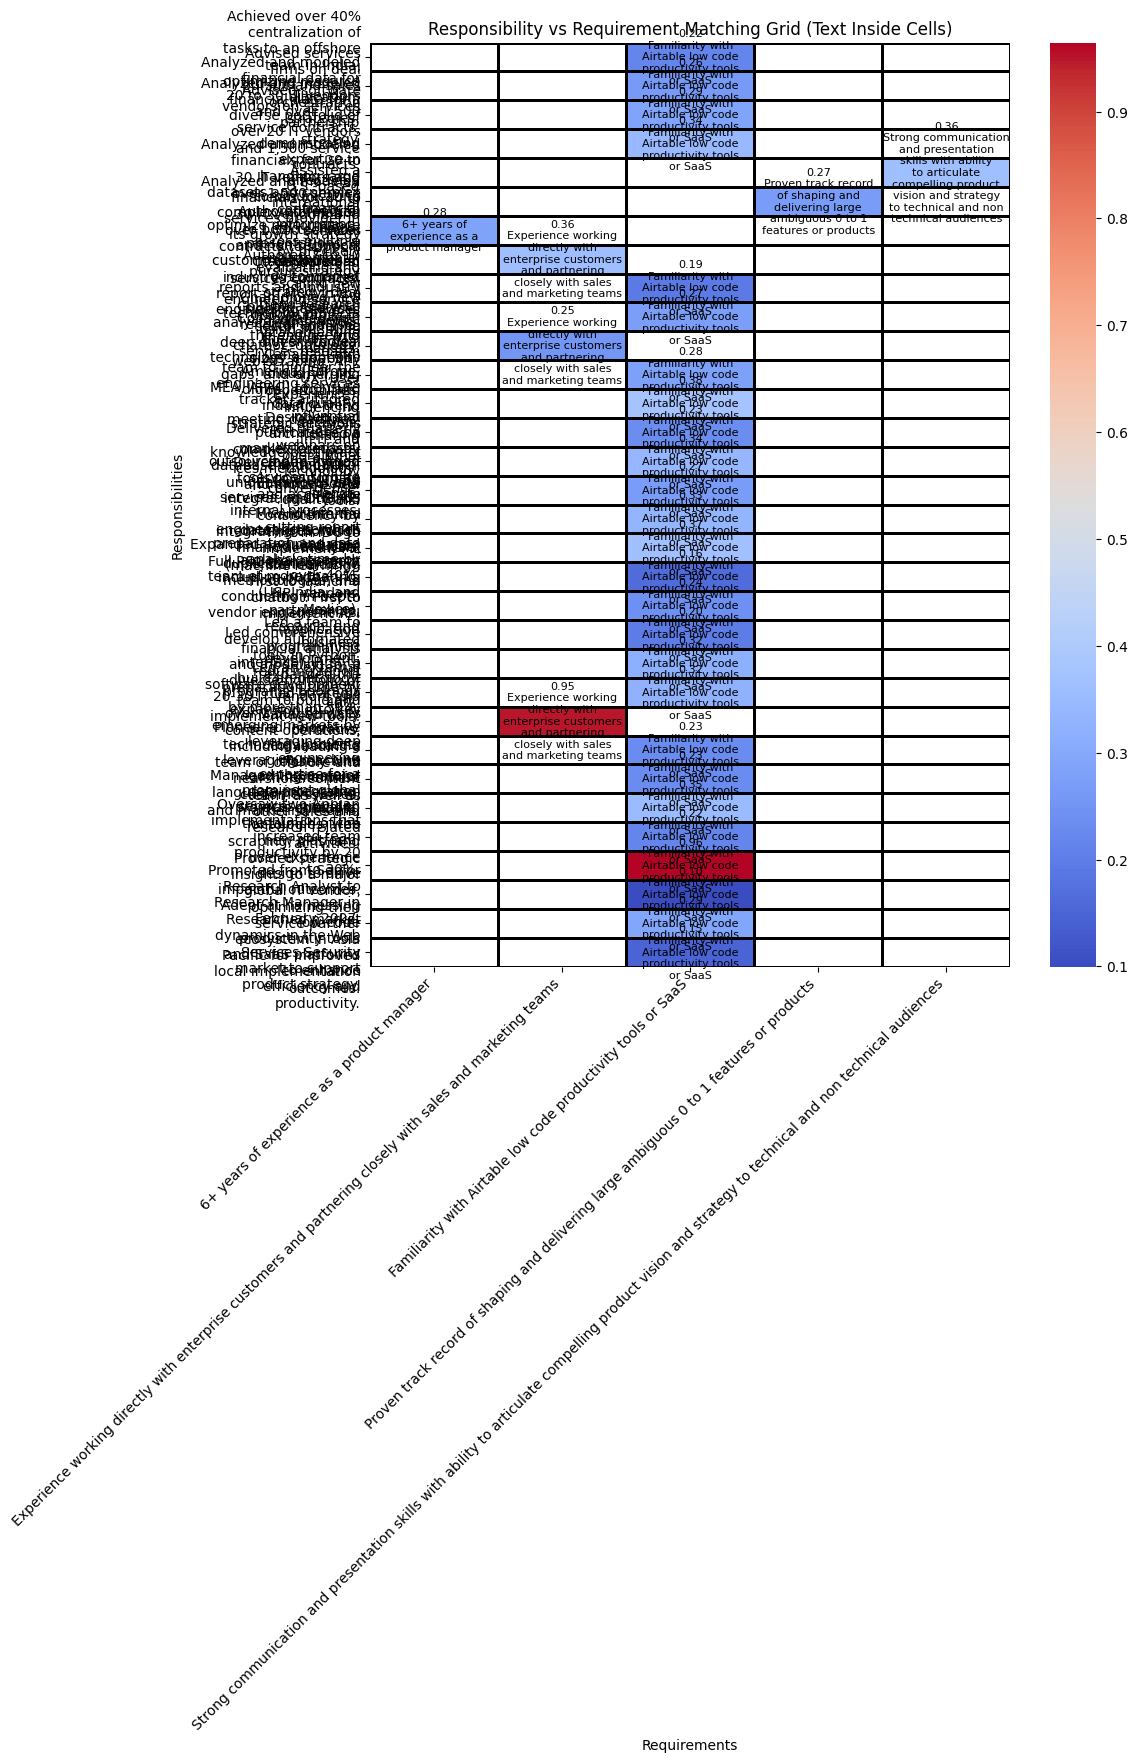

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

# Load similarity metrics CSV
file_path = file_list[1]  # Replace with your actual file path
df = pd.read_csv(file_path)

# Pivot the data to match heatmap format
pivot_df = df.pivot(
    index="responsibility", columns="requirement", values="composite_score"
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(20, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)
sns.heatmap(
    pivot_df,
    annot=False,
    fmt=".2f",
    cmap=cmap,
    linewidths=1,
    linecolor="black",
    cbar=True,
    ax=ax,
)


# Function to wrap text inside heatmap cells
def wrap_text(text, width=20):
    return "\n".join(textwrap.wrap(str(text), width))


# Wrap y-axis labels
wrapped_y_labels = [textwrap.fill(label, width=20) for label in pivot_df.index]
ax.set_yticklabels(wrapped_y_labels, rotation=0)

# Overlay text inside each cell (display composite score + wrapped requirement)
for i, res in enumerate(pivot_df.index):
    for j, req in enumerate(pivot_df.columns):
        match = df[(df["responsibility"] == res) & (df["requirement"] == req)]
        if not match.empty:
            score = match.iloc[0]["composite_score"]
            req_text = wrap_text(match.iloc[0]["requirement"], width=20)
            display_text = f"{score:.2f}\n{req_text}"
            ax.text(
                j + 0.5,
                i + 0.5,
                display_text,
                ha="center",
                va="center",
                fontsize=8,
                color="black",
            )

# Formatting adjustments
ax.set_title("Responsibility vs Requirement Matching Grid (Text Inside Cells)")
ax.set_xlabel("Requirements")
ax.set_ylabel("Responsibilities")

plt.xticks(rotation=45, ha="right")

# Increase left margin
plt.subplots_adjust(left=0.5)
# box = ax.get_position()
# ax.set_position([box.x0 + 0.2, box.y0, box.width, box.height])

plt.show()

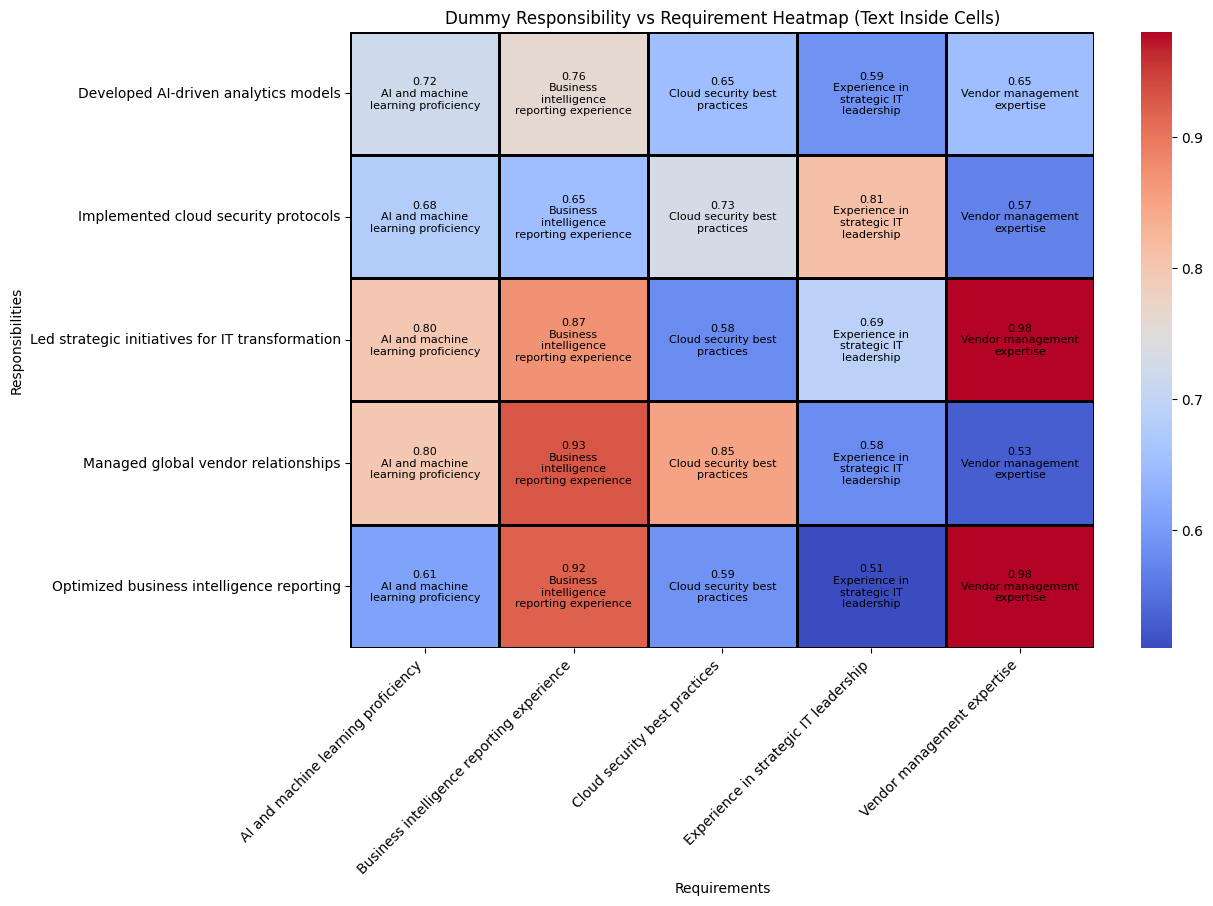

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
import numpy as np

# Sample Responsibilities and Requirements
responsibilities = [
    "Led strategic initiatives for IT transformation",
    "Managed global vendor relationships",
    "Optimized business intelligence reporting",
    "Developed AI-driven analytics models",
    "Implemented cloud security protocols",
]

requirements = [
    "Experience in strategic IT leadership",
    "Vendor management expertise",
    "Business intelligence reporting experience",
    "AI and machine learning proficiency",
    "Cloud security best practices",
]

# Generate random similarity scores between 0.5 and 1.0
np.random.seed(42)
data = []
for res in responsibilities:
    for req in requirements:
        data.append(
            {
                "responsibility": res,
                "requirement": req,
                "composite_score": round(np.random.uniform(0.5, 1.0), 2),
            }
        )

# Convert to DataFrame
df_dummy = pd.DataFrame(data)

# Pivot table for heatmap
pivot_df = df_dummy.pivot(
    index="responsibility", columns="requirement", values="composite_score"
)

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Define color scheme

# Generate heatmap
sns.heatmap(
    pivot_df,
    annot=False,
    fmt=".2f",
    cmap=cmap,
    linewidths=1,
    linecolor="black",
    cbar=True,
    ax=ax,
)


# Function to wrap text inside heatmap cells
def wrap_text(text, width=20):
    return "\n".join(textwrap.wrap(str(text), width))


# Overlay text inside each cell (score + requirement)
for i, res in enumerate(pivot_df.index):
    for j, req in enumerate(pivot_df.columns):
        match = df_dummy[
            (df_dummy["responsibility"] == res) & (df_dummy["requirement"] == req)
        ]
        if not match.empty:
            score = match.iloc[0]["composite_score"]
            req_text = wrap_text(
                match.iloc[0]["requirement"], width=20
            )  # Wrap text for better display
            display_text = f"{score:.2f}\n{req_text}"  # Display similarity score + wrapped requirement text

            ax.text(
                j + 0.5,
                i + 0.5,
                display_text,
                ha="center",
                va="center",
                fontsize=8,
                color="black",
            )

# Formatting adjustments
ax.set_title("Dummy Responsibility vs Requirement Heatmap (Text Inside Cells)")
ax.set_xlabel("Requirements")
ax.set_ylabel("Responsibilities")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)

# Show the plot
plt.show()

In [9]:
import altair as alt
import pandas as pd
import textwrap

# Load similarity metrics CSV
file_path = file_list[1]  # Replace with your actual file path
df = pd.read_csv(file_path)

# Create a wrapped version of the requirement text (width=20)
df["wrapped_requirement"] = df["requirement"].apply(
    lambda x: "\n".join(textwrap.wrap(str(x), width=20))
)
df["score_text"] = df["composite_score"].apply(lambda x: f"{x:.2f}")
df["label"] = df["score_text"] + "\n" + df["wrapped_requirement"]

# Build the heatmap chart
heatmap = (
    alt.Chart(df)
    .mark_rect()
    .encode(
        x=alt.X("requirement:N", title="Requirements", axis=alt.Axis(labelAngle=45)),
        y=alt.Y("responsibility:N", title="Responsibilities"),
        color=alt.Color(
            "composite_score:Q",
            scale=alt.Scale(scheme="redblue"),
            title="Composite Score",
        ),
    )
)

# Build the text overlay chart
# The key here is using the "detail" encoding so that each row is rendered individually.
text_overlay = (
    alt.Chart(df)
    .mark_text(
        fontSize=8,
        color="black",
        align="left",  # Set left alignment (change to 'center' if preferred)
        baseline="middle",
    )
    .encode(
        x=alt.X("requirement:N"),
        y=alt.Y("responsibility:N"),
        text=alt.Text("label:N"),
        detail="label:N",  # Force each label to be treated as a distinct detail
    )
)

# Combine the heatmap and text overlay
chart = (
    (heatmap + text_overlay)
    .properties(
        width=600,
        height=400,
        title="Responsibility vs Requirement Matching Grid (Text Inside Cells)",
    )
    .configure_view(strokeWidth=0)
)

chart.display()

alt.LayerChart(...)

## Make Cross Tab in Excel Instead

In [ ]:
import pandas as pd
import argparse


def create_pivot_table(sim_metrics_csv, output_csv):
    """
    Reads the similarity metrics CSV and creates a pivot table:
      - Index: responsibility_key
      - Columns: requirement_key
      - Values: responsibility
    Then saves it as a new CSV file.
    """
    # Load CSV file
    df = pd.read_csv(sim_metrics_csv)
    # display(df.head(5))

    # Pivot table with responsibility_key as index, requirement_key as columns, and responsibility as values
    # Multi-index for columns: (requirement_key, requirement)
    pivot_table = df.pivot(
        index="responsibility_key",
        columns=["requirement_key", "requirement"],  # Multi-index for columns
        values=["responsibility", "composite_score"],  # Multi-values in pivot
    )

    # Fill missing values with empty string
    pivot_table = pivot_table.fillna("")

    # Save to CSV
    pivot_table.to_csv(output_csv)

    print(f"Pivot table saved to {output_csv}")

    display(pivot_table.head(10))


def main():
    # Define input and output file paths
    input_csv = r"C:\github\job_bot\input_output\evaluation_optimization\evaluation_optimization_by_openai\iteration_1\similarity_metrics\Microsoft_Head_of_Partner_Intelligence_and_Strategy_sim_metrics_iter1.csv"
    output_csv = (
        r"C:\github\job_bot\data\matching_examples\resp_vs_reqs_pivot_output_1.csv"
    )

    # Call the function
    create_pivot_table(input_csv, output_csv)


if __name__ == "__main__":
    main()

### With Color Fromatting

In [18]:
import pandas as pd
from openpyxl import load_workbook
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import ColorScaleRule


def create_pivot_table(sim_metrics_csv, output_excel):
    """
    Reads the CSV and creates a pivot table:
      - Index: responsibility_key
      - Columns: (requirement_key, requirement)
      - Values: responsibility, composite_score
    Then saves it as an Excel file and applies conditional formatting.
    """
    # Load CSV file
    df = pd.read_csv(sim_metrics_csv)

    # Format responsibility text based on composite_score
    def format_responsibility(row):
        if pd.isna(row["composite_score"]):  # Handle NaN values
            return row["responsibility"]
        elif row["composite_score"] >= 0.75:
            return f"⭐ {row['responsibility']}"  # Highlight important ones
        elif row["composite_score"] < 0.3:
            return f"❌ {row['responsibility']}"  # Mark low ones
        return row["responsibility"]

    df["formatted_responsibility"] = df.apply(format_responsibility, axis=1)

    # Create pivot table
    pivot_table = df.pivot_table(
        index="responsibility_key",
        columns=["requirement_key", "requirement"],
        values=["formatted_responsibility", "composite_score"],
        aggfunc="first",
    )

    pivot_table = pivot_table.fillna("")
    pivot_table.to_excel(output_excel)

    # Apply Conditional Formatting
    apply_conditional_formatting(output_excel)
    print(f"Pivot table saved and formatted at: {output_excel}")


def apply_conditional_formatting(excel_file):
    """Finds composite_score columns in the pivot and applies a color scale formatting."""
    wb = load_workbook(excel_file)
    ws = wb.active

    # Define a Color Scale Rule (Red - Yellow - Green)
    color_rule = ColorScaleRule(
        start_type="num",
        start_value=0,
        start_color="FF6347",  # Red
        mid_type="num",
        mid_value=0.5,
        mid_color="FFFF00",  # Yellow
        end_type="num",
        end_value=1,
        end_color="00FF00",  # Green
    )

    # Detect composite_score columns explicitly
    for col in range(2, ws.max_column + 1):  # Columns start at 2
        header = ws.cell(row=1, column=col).value  # Get column header
        if header and "composite_score" in str(header):  # Ensure it's a valid column
            col_letter = ws.cell(row=1, column=col).column_letter
            ws.conditional_formatting.add(
                f"{col_letter}2:{col_letter}{ws.max_row}", color_rule
            )

    wb.save(excel_file)
    print("✅ Conditional formatting applied successfully!")


def main():
    input_csv = r"C:\github\job_bot\input_output\evaluation_optimization\evaluation_optimization_by_openai\iteration_1\similarity_metrics\Microsoft_Head_of_Partner_Intelligence_and_Strategy_sim_metrics_iter1.csv"
    output_excel = (
        r"C:\github\job_bot\data\matching_examples\resp_vs_reqs_pivot_output_1.xlsx"
    )

    create_pivot_table(input_csv, output_excel)


if __name__ == "__main__":
    main()

✅ Conditional formatting applied successfully!
Pivot table saved and formatted at: C:\github\job_bot\data\matching_examples\resp_vs_reqs_pivot_output_1.xlsx


#### With Xlxings

In [2]:
import pandas as pd
import xlwings as xw


def create_pivot_table(sim_metrics_csv, output_excel):
    """
    Reads the CSV and creates a pivot table:
      - Index: responsibility_key
      - Columns: (requirement_key, requirement)
      - Values: responsibility, composite_score
    Then saves it as an Excel file and applies conditional formatting using xlwings.
    """
    # Load CSV file
    df = pd.read_csv(sim_metrics_csv)

    # Format responsibility text based on composite_score
    def format_responsibility(row):
        if pd.isna(row["composite_score"]):  # Handle NaN values
            return row["responsibility"]
        elif row["composite_score"] >= 0.75:
            return f"{row['responsibility']}"  # Highlight important ones
        elif row["composite_score"] < 0.3:
            return f"{row['responsibility']}"  # Mark low ones
        return row["responsibility"]

    df["formatted_responsibility"] = df.apply(format_responsibility, axis=1)

    # Create pivot table
    pivot_table = df.pivot_table(
        index="responsibility_key",
        columns=["requirement_key", "requirement"],
        values=["formatted_responsibility", "composite_score"],
        aggfunc="first",
    )

    pivot_table = pivot_table.fillna("")
    pivot_table.to_excel(output_excel)

    # Apply Conditional Formatting with xlwings
    apply_xlwings_formatting(output_excel)
    print(f"Pivot table saved and formatted at: {output_excel}")


import xlwings as xw


def apply_xlwings_formatting(excel_file):
    """Applies conditional formatting to value cells (not headers) based on their composite_score."""
    app = xw.App(visible=True)  # Keep Excel open for debugging
    wb = xw.Book(excel_file)
    ws = wb.sheets[0]

    # Detect last row and last column
    last_row = ws.range("A1").expand("down").last_cell.row
    last_col = ws.range("A1").expand("right").last_cell.column

    # Iterate through all data cells (excluding headers)
    for row in range(2, last_row + 1):  # Start from row 2 to avoid header
        for col in range(2, last_col + 1):  # Start from col 2 to avoid row labels
            cell = ws.cells(row, col)
            try:
                value = float(cell.value)  # Convert value to float
                if value >= 0.75:
                    cell.api.Interior.Color = xw.utils.rgb_to_int(
                        (0, 255, 0)
                    )  # Green for high scores
                elif value < 0.3:
                    cell.api.Interior.Color = xw.utils.rgb_to_int(
                        (255, 0, 0)
                    )  # Red for low scores
                else:
                    cell.api.Interior.Color = xw.utils.rgb_to_int(
                        (255, 255, 0)
                    )  # Yellow for mid-range scores
            except (ValueError, TypeError):
                pass  # Ignore non-numeric values

    wb.save()
    wb.close()
    app.quit()
    print("✅ Conditional formatting applied to value cells!")


def main():
    input_csv = r"C:\github\job_bot\input_output\evaluation_optimization\evaluation_optimization_by_openai\iteration_1\similarity_metrics\Microsoft_Head_of_Partner_Intelligence_and_Strategy_sim_metrics_iter1.csv"
    output_excel = (
        r"C:\github\job_bot\data\matching_examples\resp_vs_reqs_pivot_output_1.xlsx"
    )

    create_pivot_table(input_csv, output_excel)


if __name__ == "__main__":
    main()

✅ Conditional formatting applied to value cells!
Pivot table saved and formatted at: C:\github\job_bot\data\matching_examples\resp_vs_reqs_pivot_output_1.xlsx


In [6]:
input_csv = r"C:\github\job_bot\input_output\evaluation_optimization\evaluation_optimization_by_anthropic\iteration_1\responsibilities\older_files\PwC_Strategy__Manager_-_Digital_Value_Transformation_Contact_Center_resps_nested_iter1.json"

with open(input_csv, "r", encoding="utf-8") as f:
    for _ in range(30):  # Print first 30 lines
        print(f.readline().strip())

{
"url": "https://jobs.us.pwc.com/job/-/-/932/76064801072?utm_source=linkedin.com&utm_campaign=core_media&utm_medium=social_media&utm_content=job_posting&ss=paid&dclid=CjgKEAiAwaG9BhCY3ayl47PW8lcSJAA_gCfjt-rzWhQetHLIbJdJBVocWQm2BRNcBgOARxhGyR9bgvD_BwE",
"responsibilities": {
"0.responsibilities.0": {
"optimized_by_requirements": {
"0.pie_in_the_sky.0": {
"optimized_text": "Optimized service partner network across Asia Pacific region to drive enhanced local implementation outcomes for prominent international IT company. Proven track record of success in digital value creation and contact center/service excellence."
},
"0.pie_in_the_sky.1": {
"optimized_text": "Provided strategic insights to a major global IT vendor, optimizing their service partner ecosystem in Asia Pacific for improved local implementation outcomes."
}
}
},
"0.responsibilities.1": {
"optimized_by_requirements": {
"0.pie_in_the_sky.0": {
"optimized_text": "Assisted a U.S.-based international services provider in its gro

In [22]:
#!/usr/bin/env python3
import pandas as pd
import argparse
import os
import xlsxwriter


def create_two_row_header_excel(sim_metrics_csv, output_file):
    """
    Reads the similarity metrics CSV and creates an Excel file with:
      - Row 1: "Resp Key / Req Key" + requirement keys
      - Row 2: "Requirements" + requirement texts
      - Rows 3+: One row per responsibility key, showing matched responsibility texts
    """
    # 1) Load the similarity metrics CSV
    df = pd.read_csv(sim_metrics_csv)

    # 2) Extract unique requirements and map to their texts
    req_map = df.groupby("requirement_key")["requirement"].first().to_dict()
    req_keys = sorted(req_map.keys())  # Ordered list of requirement keys
    req_texts = [req_map[k] for k in req_keys]  # Corresponding requirement texts

    # 3) Extract unique responsibilities
    resp_keys = sorted(df["responsibility_key"].unique())

    # 4) Create a dataframe to ensure all `requirement_keys` appear
    full_pivot = pd.DataFrame(index=resp_keys, columns=req_keys).fillna("")

    # 5) Pivot the table to get optimized_text per (responsibility, requirement) pair
    pivot = df.pivot(
        index="responsibility_key", columns="requirement_key", values="responsibility"
    )

    # 6) Merge the pivoted data into `full_pivot` to retain all columns
    full_pivot.update(pivot)

    # 7) Reset index so responsibility_key becomes a column
    full_pivot = full_pivot.reset_index()

    # 8) Prepare the first two header rows (Multi-layer Headers)
    header1 = ["Resp Key / Req Key"] + req_keys  # First row (Keys)
    header2 = ["Requirements"] + req_texts  # Second row (Descriptions)

    # 9) Write to Excel using xlsxwriter (Multi-layer Headers)
    workbook = xlsxwriter.Workbook(output_file)
    worksheet = workbook.add_worksheet("CrossTab")

    # Apply formatting
    bold_format = workbook.add_format(
        {"bold": True, "bg_color": "#002b36", "font_color": "white"}
    )
    wrap_format = workbook.add_format({"text_wrap": True, "align": "top"})

    # Merge header rows for multi-layer effect
    worksheet.write_row(0, 0, header1, bold_format)  # Row 1: Requirement Keys
    worksheet.write_row(1, 0, header2, wrap_format)  # Row 2: Requirement Texts

    # Write responsibilities data (row 3+)
    for row_idx, row in enumerate(full_pivot.itertuples(index=False), start=2):
        worksheet.write_row(row_idx, 0, row, wrap_format)

    # Adjust column widths for readability
    worksheet.set_column(0, 0, 25)  # Responsibility Key column
    worksheet.set_column(1, len(req_keys), 50)  # Requirement columns

    workbook.close()
    print(f"Excel file created: {output_file}")


def main():
    parser = argparse.ArgumentParser(
        description="Create a 2-row-header Excel from similarity metrics CSV."
    )
    parser.add_argument(
        "--sim_metrics_csv",
        required=True,
        help="Path to the similarity metrics CSV file",
    )
    parser.add_argument(
        "--output",
        required=True,
        help="Path to the output Excel file (e.g., output.xlsx)",
    )
    args = parser.parse_args()

    # Create the output directory if it doesn't exist
    output_dir = os.path.dirname(args.output)
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    create_two_row_header_excel(args.sim_metrics_csv, args.output)


if __name__ == "__main__":
    # Example file paths (adjust these as needed)
    input_csv = r"C:\github\job_bot\input_output\evaluation_optimization\evaluation_optimization_by_anthropic\iteration_1\similarity_metrics\Thermo_Fisher_Scientific_Market___Competitive_Intelligence_Manager_sim_metrics_iter1.csv"
    output_excel = (
        r"C:\github\job_bot\data\matching_examples\resp_vs_reqs_crosstab_output_1.xlsx"
    )

    # Directly call the function with desired column names:
    create_two_row_header_excel(
        sim_metrics_csv=input_csv,
        output_file=output_excel,
    )

Excel file created: C:\github\job_bot\data\matching_examples\resp_vs_reqs_crosstab_output_1.xlsx


In [20]:
from pathlib import Path
import pandas as pd


def create_cross_tab(sim_metric_csv_file: Path, output_excel_file: Path):
    # Load the CSV file
    df = pd.read_csv(sim_metric_csv_file)

    # Create a pivot table (cross-tab) based on responsibility_key and requirement_key
    cross_tab = pd.pivot_table(
        df,
        values="responsibility",
        index="responsibility_key",
        columns="requirement_key",
        aggfunc=lambda x: " ".join(x),
    )

    # Extract unique requirements and their corresponding keys
    requirements = (
        df[["requirement_key", "requirement"]]
        .drop_duplicates()
        .set_index("requirement_key")["requirement"]
    )

    # Create a DataFrame for the requirements row with the same columns as cross_tab
    requirements_row = pd.DataFrame([requirements], columns=cross_tab.columns)

    # Combine the requirements row with the cross-tab table
    cross_tab_with_requirements = pd.concat([requirements_row, cross_tab], axis=0)

    # Reset the index to make the table cleaner
    cross_tab_with_requirements.reset_index(drop=True, inplace=True)

    # Save the cross-tab table with requirements to an Excel file
    cross_tab_with_requirements.to_excel(output_excel_file, index=False)

    print(f"Cross-tab table with requirements saved to {output_excel_file}")


# Input and output file paths
input_csv = r"C:\github\job_bot\input_output\evaluation_optimization\evaluation_optimization_by_anthropic\iteration_1\similarity_metrics\Thermo_Fisher_Scientific_Market___Competitive_Intelligence_Manager_sim_metrics_iter1.csv"
output_excel = (
    r"C:\github\job_bot\data\matching_examples\resp_vs_reqs_crosstab_output_1.xlsx"
)

# Create the cross-tab table
create_cross_tab(Path(input_csv), Path(output_excel))

Cross-tab table with requirements saved to C:\github\job_bot\data\matching_examples\resp_vs_reqs_crosstab_output_1.xlsx


In [ ]:
responsibilities="{'0.responsibilities.0': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Led strategic initiatives to optimize the service partner network for a prominent international IT company in the Asia Pacific market, resulting in enhanced local execution outcomes. Possess extensive experience in analytical roles.'), '1.down_to_earth.1': OptimizedText(optimized_text="Led the optimization of a major global IT vendor's service partner ecosystem in the Asia Pacific region, resulting in improved local implementation outcomes. Leveraged extensive client-facing experience to drive these strategic enhancements."), '1.down_to_earth.2': OptimizedText(optimized_text='Led strategic consulting and analytics initiatives for a leading global IT vendor, driving enhancements to their partner ecosystem in the Asia Pacific region and delivering improved local implementation outcomes.'), '1.down_to_earth.3': OptimizedText(optimized_text="Led the optimization of a major global IT vendor's service partner ecosystem in the Asia Pacific region, driving improved local implementation results."), '2.other.0': OptimizedText(optimized_text='Led strategic initiatives that optimized the service partner network of a leading global IT vendor in the Asia Pacific region, resulting in enhanced local implementation and improved client outcomes.')}), '0.responsibilities.1': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Led the strategic growth of a leading international services provider by identifying and scaling new engineering service opportunities in key emerging markets.'), '1.down_to_earth.1': OptimizedText(optimized_text="Led the evaluation and scaling of new engineering service opportunities in vital emerging markets to support a leading international services provider's growth strategy."), '1.down_to_earth.2': OptimizedText(optimized_text='Led strategic analysis to identify and capitalize on new engineering service opportunities in key emerging markets, driving growth for a leading international services provider.'), '1.down_to_earth.3': OptimizedText(optimized_text='Led the evaluation and scaling of new engineering service opportunities in vital emerging markets to support the growth strategy of a U.S.-based international services provider.'), '2.other.0': OptimizedText(optimized_text='Led the expansion strategy for a leading international services provider by identifying and scaling new engineering service opportunities in key emerging markets.')}), '0.responsibilities.2': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Authored impactful industry reports analyzing engineering services merger and acquisition trends, providing strategic insights into deal sizes, capability gaps, and emerging opportunities to inform decisions on IT and operational technology convergence.'), '1.down_to_earth.1': OptimizedText(optimized_text='Led the co-authorship of an industry-recognized report on M&A trends in the engineering services sector, providing strategic insights into deal sizes, capability gaps, and emerging opportunities to guide decision-making on IT and operational technology convergence.'), '1.down_to_earth.2': OptimizedText(optimized_text='Authored insightful industry reports analyzing mergers and acquisitions in the engineering services sector. Provided comprehensive insights into deal sizes, capability gaps, and emerging opportunities, informing strategic decisions on IT and operational technology convergence.'), '1.down_to_earth.3': OptimizedText(optimized_text='Led the development of an industry-recognized report on mergers and acquisitions in the engineering services sector, delivering in-depth analysis of deal dynamics, capability gaps, and emerging opportunities at the intersection of IT and operational technology. Leveraged these insights to drive strategic planning and execution.'), '2.other.0': OptimizedText(optimized_text='Authored a comprehensive industry report on mergers and acquisitions in the engineering services sector, providing in-depth analysis of deal sizes, capability gaps, and emerging opportunities. The report informed strategic decisions regarding the convergence of information technology and operational technology.')}), '0.responsibilities.3': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Led efforts to enhance data quality and consistency through thorough financial analysis, standardized methodologies, and collaborative vendor engagements.'), '1.down_to_earth.1': OptimizedText(optimized_text='Drove the enhancement of data quality and consistency by integrating thorough financial analysis, standardizing methodologies, and conducting in-depth vendor engagements.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led consultative analytics engagements, leveraging financial analysis, standardized methodologies, and vendor collaborations to enhance data quality and consistency.'), '1.down_to_earth.3': OptimizedText(optimized_text='Transformed data quality and consistency by integrating financial analysis, standardizing methodologies, and engaging vendors.'), '2.other.0': OptimizedText(optimized_text='Drove impactful improvements in data quality and consistency by integrating thorough financial analysis, standardizing methodologies, and conducting in-depth vendor engagements.')}), '0.responsibilities.4': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Led the optimization of resource allocation through centralization of tasks, transitioning a significant portion of work to an offshore team in India, which resulted in increased efficiency and cost savings.'), '1.down_to_earth.1': OptimizedText(optimized_text='Led offshore teams, optimized resource utilization, and enhanced operational efficiency. Extensive client-facing experience.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led the centralization of over 40% of tasks to an offshore team in India, optimizing resource allocation and driving significant improvements in team productivity and efficiency.'), '1.down_to_earth.3': OptimizedText(optimized_text='Centralized over 40% of tasks to an offshore team, optimizing resource allocation for enhanced efficiency.'), '2.other.0': OptimizedText(optimized_text='Centralized over 40% of tasks to an offshore team, optimizing resource allocation and supporting product development through client services feedback.')}), '0.responsibilities.5': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Automated and streamlined internal processes using Python, driving over 40% improvements in report preparation and data analysis.'), '1.down_to_earth.1': OptimizedText(optimized_text='Led the development of custom Python tools that automated and optimized internal workflows, resulting in a 40% decrease in report generation and data analysis time. Leveraged extensive experience collaborating with clients to deliver tailored solutions.'), '1.down_to_earth.2': OptimizedText(optimized_text='Developed custom Python tools that streamlined and accelerated internal processes, delivering over 40% reduction in report preparation and data analysis time. Led consultative analytics engagements with clients.'), '1.down_to_earth.3': OptimizedText(optimized_text='Led the development of custom Python tools that streamlined and accelerated internal processes, driving significant improvements in efficiency across report preparation and data analysis.'), '2.other.0': OptimizedText(optimized_text='Leveraged advanced Python programming skills to create custom tools that streamlined internal operations, driving over 40% improvements in report preparation and data analysis efficiency.')}), '0.responsibilities.6': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Analytical leader with a proven track record of pioneering groundbreaking industry research and publications. Collaborated extensively with engineering services teams to develop market forecasts, analyze the impact of COVID-19, and identify emerging trends in mergers and acquisitions within the engineering services sector.'), '1.down_to_earth.1': OptimizedText(optimized_text='Led the engineering services research team in pioneering the engineering services tracker, authored impactful publications on market forecasts, the impact of COVID-19 on services, and trends in mergers and acquisitions within the engineering services industry. Demonstrated substantial client-facing experience.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led the development of the engineering services tracker and authored influential publications on market forecasts, the impact of COVID-19 on services, and trends in M&A within the engineering services industry.'), '1.down_to_earth.3': OptimizedText(optimized_text='Pioneered industry-leading engineering services tracker and authored impactful publications on market forecasts, COVID-19 impact, and engineering services M&A trends. Demonstrated ability to effectively manage complex projects and deliver valuable insights to stakeholders.'), '2.other.0': OptimizedText(optimized_text='Led engineering services research team to pioneer engineering services tracker, authored influential publications on market forecasts, the impact of COVID-19 on services, and industry trends. Leveraged these insights to drive product development through client services feedback.')}), '0.responsibilities.7': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Seasoned data analyst who led global teams (US, Canada, Latin America, Europe, MEA, APAC) to maintain data integrity, achieve objectives, and share expertise. Adept at identifying and implementing innovative analytical tools and techniques.'), '1.down_to_earth.1': OptimizedText(optimized_text='Led collaborative efforts with global analyst teams to ensure data quality, meet deadlines, share knowledge, and implement best practices and new tools.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led consultative analytics engagements with global analyst teams. Ensured data quality, met deadlines, and shared knowledge, best practices, and methodology to procure new tools.'), '1.down_to_earth.3': OptimizedText(optimized_text='Collaborated with global analyst teams to ensure data quality, meet deadlines, share knowledge, implement best practices, and procure new tools.'), '2.other.0': OptimizedText(optimized_text='Led international analyst teams to maintain data integrity, achieve project milestones, exchange expertise and best practices, and acquire innovative tools in support of product development initiatives.')}), '1.responsibilities.0': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Seasoned leader with a proven record in full P&L oversight, including budgeting, HR, vendor relations, partnerships, research, and business development. Drove significant growth, expanding program bookings by over 50%. Extensive experience in analytical roles, with a strong foundation in data-driven decision-making and strategic planning.'), '1.down_to_earth.1': OptimizedText(optimized_text='Skilled leader with a proven track record in full P&L management, overseeing budgeting, HR, vendor relations, partnerships, research, and business development. Drove significant growth, expanding program bookings by over 50%. Excelled in client-facing roles, delivering exceptional service and driving impactful business results.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led full P&L management, including budgeting, HR, vendor relationships, partnerships, research, and business development. Drove significant expansion, growing program bookings by over 50%.'), '1.down_to_earth.3': OptimizedText(optimized_text='Adept leader with a proven record of full P&L management, overseeing diverse responsibilities including budgeting, human resources, vendor relationships, strategic partnerships, research, and business development. Drove significant growth, expanding program bookings by over 50%, showcasing exceptional project management skills.'), '2.other.0': OptimizedText(optimized_text='Led full profit and loss responsibilities, excelling at budgeting, human resources, vendor relationships, partnerships, research, and business development. Drove significant growth, increasing program bookings by over 50%.')}), '1.responsibilities.1': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Directed and expanded diverse global research teams, leading a global team of over 15 professionals across the US, India, and Mexico.'), '1.down_to_earth.1': OptimizedText(optimized_text='Led a global research team, leveraging diverse perspectives to drive innovation across multiple locations.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led and grew a diverse global research team spanning multiple locations.'), '1.down_to_earth.3': OptimizedText(optimized_text='Led and managed diverse, global research teams to drive successful project outcomes.'), '2.other.0': OptimizedText(optimized_text='Led and expanded a diverse, global research team across strategic locations, enabling informed product development through client feedback.')}), '1.responsibilities.2': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Managed cross-functional teams to deliver innovative software solutions.'), '1.down_to_earth.1': OptimizedText(optimized_text='Managed cross-functional teams to deliver innovative software solutions for clients.'), '1.down_to_earth.2': OptimizedText(optimized_text='Spearheaded cross-functional teams to ideate, build, and deploy innovative software solutions that addressed client needs. Led an external software development team to build and implement new tools.'), '1.down_to_earth.3': OptimizedText(optimized_text='Spearheaded the development and implementation of innovative software tools and solutions by leading an external software development team.'), '2.other.0': OptimizedText(optimized_text='Collaborated with an external software development team to build and implement new tools that enhanced product development efforts.')}), '1.responsibilities.3': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Experienced leader who championed cutting-edge technology initiatives, including machine learning, natural language processing, chatbots, ontologies, web scraping, APIs, and user experience design. Demonstrated strong analytical skills with a data-driven approach honed over 8+ years.'), '1.down_to_earth.1': OptimizedText(optimized_text='Led impactful and innovative technology projects leveraging cutting-edge tools like machine learning, natural language processing, chatbots, ontologies, web scraping, APIs, and user experience design. Collaborated extensively with stakeholders to deliver tailored solutions that exceeded expectations.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led innovative technology initiatives that leveraged cutting-edge tools and techniques, including machine learning, natural language processing, chatbots, ontologies, web scraping, APIs, and user experience design.'), '1.down_to_earth.3': OptimizedText(optimized_text='Led the successful implementation of cutting-edge technology initiatives, including machine learning, natural language processing, chatbots, ontology development, web scraping, API integration, and user experience design. Extensive experience in managing complex technology projects and delivering innovative solutions that drive business growth.'), '2.other.0': OptimizedText(optimized_text='Spearheaded innovative product development and enhanced user experience by leveraging cutting-edge technologies, including machine learning, natural language processing, chatbots, ontologies, web scraping, and APIs.')}), '1.responsibilities.4': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Developed and led a team to create Python-based automated tools that streamlined report preparation, driving 40% time savings.'), '1.down_to_earth.1': OptimizedText(optimized_text='Drove development of automated Python tools, reducing report preparation time by 40%.'), '1.down_to_earth.2': OptimizedText(optimized_text='Developed and implemented automated Python tools, driving a 40% reduction in report preparation time.'), '1.down_to_earth.3': OptimizedText(optimized_text='Adept project manager who led teams in developing custom Python-based tools, enhancing reporting efficiency by 40%.'), '2.other.0': OptimizedText(optimized_text='Developed Python-based automated solutions that streamlined report generation and enhanced overall operational efficiency.')}), '1.responsibilities.5': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Pioneered cutting-edge technologies, leading the implementation of machine learning, chatbots, APIs, and ontology development. Excels in analytical roles, delivering impactful solutions that drive business success.'), '1.down_to_earth.1': OptimizedText(optimized_text='Pioneered cutting-edge technology projects, including deploying machine learning, chatbots, APIs, and ontology development. Delivered client-focused solutions with a proven track record.'), '1.down_to_earth.2': OptimizedText(optimized_text='Pioneering technology executive with a track record of leading transformative initiatives, including the implementation of cutting-edge solutions such as machine learning, chatbots, APIs, and ontology development. Excels at driving strategic analytics engagements and delivering impactful consultative services to clients.'), '1.down_to_earth.3': OptimizedText(optimized_text='Innovative technology leader who pioneered cutting-edge solutions including machine learning, chatbots, APIs, and ontology development. Skilled at driving high-impact projects and delivering measurable results.'), '2.other.0': OptimizedText(optimized_text='Led the implementation of machine learning, launch of a chatbot, development of APIs, and construction of an ontology to drive innovation with emerging technologies. Collaborated closely with clients to provide valuable feedback that informed and supported ongoing product development efforts.')}), '1.responsibilities.6': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Leveraged analytical expertise to advise services firms on deal pursuit and sales orchestration strategies, driving business development and sales execution.'), '1.down_to_earth.1': OptimizedText(optimized_text='Guided professional services firms in developing their deal pursuit and sales strategy.'), '1.down_to_earth.2': OptimizedText(optimized_text='Advised services firms on deal pursuit and sales orchestration strategies, providing strategic guidance and expertise.'), '1.down_to_earth.3': OptimizedText(optimized_text='Proven leader who advised services firms on developing and executing effective deal pursuit and sales strategies.'), '2.other.0': OptimizedText(optimized_text='Drove deal pursuit and sales orchestration strategies for professional services firms, leveraging client insights to inform product development.')}), '1.responsibilities.7': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Advised software vendors on partnership strategy, leveraging extensive analytical expertise to provide strategic advisory services.'), '1.down_to_earth.1': OptimizedText(optimized_text='Advised software vendors on strategic partnerships and delivered client-facing services.'), '1.down_to_earth.2': OptimizedText(optimized_text='Guided software vendors on partnership opportunities and drove consultative analytics engagements with clients.'), '1.down_to_earth.3': OptimizedText(optimized_text='Guided software vendors on partnership strategy, leveraging extensive experience to deliver strategic guidance and drive successful initiatives.'), '2.other.0': OptimizedText(optimized_text='Guided software vendors on strategic services partnerships, driving successful client engagements.')}), '1.responsibilities.8': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Prolific content creator who authored reports, blogs, presentations, and custom research. Leveraged industry insights to drive strategic decision-making, analyzing go-to-market strategies, deal signing, renewal analysis, buyer studies, and technology trends (cloud, AI, ML, digital, etc.). Demonstrated extensive experience in an analytical role.'), '1.down_to_earth.1': OptimizedText(optimized_text='Prolific author of reports, blogs, presentations, and custom research. Adept at analyzing go-to-market strategies, deal signing, renewal trends, buyer behavior, and the adoption of emerging technologies such as cloud, AI, ML, and digital solutions. Proven track record of providing valuable industry insights and trend analysis to clients.'), '1.down_to_earth.2': OptimizedText(optimized_text='Seasoned professional who authors reports, blogs, presentations, and custom research. Adept at analyzing go-to-market strategies, deal signing, renewal trends, buyer behavior, and technology adoptions (cloud, AI, ML, digital, etc.), as well as identifying industry trends. Skilled in delivering consultative analytics engagements to clients.'), '1.down_to_earth.3': OptimizedText(optimized_text='Authored impactful reports, blogs, presentations, and custom research on go-to-market strategy, deal analysis, buyer studies, and industry trends. Leveraged emerging technologies like cloud, AI, and ML to deliver actionable insights.'), '2.other.0': OptimizedText(optimized_text='Accomplished professional who has authored impactful reports, blogs, presentations, and custom research projects. Expertise spans developing go-to-market strategies, conducting deal and renewal analyses, executing buyer studies, and analyzing technology adoption trends (e.g., cloud, AI, ML, digital). Regularly provided valuable insights and feedback to drive product development efforts.')}), '2.responsibilities.0': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Led quarterly webinars analyzing industry trends in outsourcing and managed services.'), '1.down_to_earth.1': OptimizedText(optimized_text='Conducted quarterly webinars on outsourcing and managed services trends.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led quarterly webinar series to present industry insights and best practices to clients.'), '1.down_to_earth.3': OptimizedText(optimized_text='Seasoned professional who has delivered quarterly webinars showcasing industry insights and best practices on outsourcing and managed services signing trends.'), '2.other.0': OptimizedText(optimized_text='Conducted quarterly webinars to share industry insights and client feedback, driving product development initiatives.')}), '2.responsibilities.1': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Authored insightful pursuit strategy reports and industry trend research.'), '1.down_to_earth.1': OptimizedText(optimized_text='Authored compelling pursuit strategy reports and conducted in-depth industry trend research, leveraging a strong background in client-facing roles.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led consultative analytics engagements and produced industry-leading research reports.'), '1.down_to_earth.3': OptimizedText(optimized_text='Authored strategic planning and industry analysis reports, demonstrating a proven track record in project management.'), '2.other.0': OptimizedText(optimized_text='Drove product development by leveraging client feedback and industry research.')}), '3.responsibilities.0': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Designed and architected complex database systems, integrating diverse data sources and enhancing data quality through deduplication initiatives. Demonstrated a proven track record in analytical roles over multiple years.'), '1.down_to_earth.1': OptimizedText(optimized_text='Designed and architected a complex company database, integrating external and internal data sources to significantly reduce data duplication. Led client-facing initiatives throughout my career, demonstrating extensive experience in this area.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led the technical design and architecture of a large-scale enterprise database, integrating multiple data sources to enhance data integrity and streamline operations. Demonstrated extensive expertise in complex data architecture and integration, collaborating with stakeholders to deliver impactful solutions that reduced data duplication by 50%.'), '1.down_to_earth.3': OptimizedText(optimized_text='Designed and architected sophisticated database solutions, integrating diverse data sources to enhance integrity and optimize management processes. Reduced data duplication by 50% in a complex company database with 100K+ unique records, seamlessly integrating DnB API and internal databases.'), '2.other.0': OptimizedText(optimized_text='Led the design and implementation of a comprehensive database system, consolidating diverse data sources to enhance data quality and streamline operations.')}), '3.responsibilities.1': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Drove implementation of process automation solutions that boosted productivity across multiple industries.'), '1.down_to_earth.1': OptimizedText(optimized_text='Results-driven professional with a proven track record of leading successful client-facing projects, including managing the implementation of two Appian solutions that enhanced team productivity by 20 to 30%.'), '1.down_to_earth.2': OptimizedText(optimized_text='Driven leader who managed multiple Appian implementations that delivered substantial productivity gains for client teams.'), '1.down_to_earth.3': OptimizedText(optimized_text='Accomplished project manager who led two successful Appian implementations that drove 20-30% improvements in team productivity.'), '2.other.0': OptimizedText(optimized_text='Led two Appian implementations that drove 20-30% improvements in team productivity.')}), '3.responsibilities.2': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Managed daily content operations, including leading a team of offshore and nearshore content team, as well as other sales and research related activities. Seasoned professional with a proven track record in managing content operations, leading cross-functional teams, and supporting sales and research initiatives.'), '1.down_to_earth.1': OptimizedText(optimized_text='Directed daily content operations, leading a team of offshore and nearshore content specialists, and supporting sales and research initiatives. Demonstrated extensive client-facing expertise.'), '1.down_to_earth.2': OptimizedText(optimized_text='Managed daily content operations, leading a team of offshore and nearshore content professionals, and overseeing a range of sales and research-related initiatives.'), '1.down_to_earth.3': OptimizedText(optimized_text='Managed daily content operations, including leading a team of offshore and nearshore content professionals as well as sales and research-related initiatives. Skilled at project management and delivering high-quality results.'), '2.other.0': OptimizedText(optimized_text='Led a talented content team to drive daily operations, collaborating with sales and research to support strategic initiatives.')}), '3.responsibilities.3': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Analyzed and modeled financials for 20-30 IT vendors and over 1,500 services contracts, delivering critical insights to support vendor and contract management.'), '1.down_to_earth.1': OptimizedText(optimized_text="Analyzed and modeled financials for 20 to 30 IT vendors' diverse portfolios. Reviewed and negotiated over 1,500 service contracts with extensive client-facing experience."), '1.down_to_earth.2': OptimizedText(optimized_text='Analyzed and modeled financials for 20 to 30 IT vendors and over 1,500 service contracts to support consultative engagements.'), '1.down_to_earth.3': OptimizedText(optimized_text='Analyzed and modeled financial data for 20 to 30 IT vendors and over 1,500 services contracts, leveraging insights to drive successful contract management.'), '2.other.0': OptimizedText(optimized_text='Analyzed and modeled financial data for 20 to 30 IT vendors and over 1,500 service contracts to support product development efforts by gathering and incorporating client services feedback.')}), '3.responsibilities.4': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Experienced data integration project manager who led the successful delivery of mission-critical platform initiatives.'), '1.down_to_earth.1': OptimizedText(optimized_text='Led three major data integration projects critical to the successful launch of a new platform. Adept at delivering high-impact client-facing solutions.'), '1.down_to_earth.2': OptimizedText(optimized_text='Led multiple data integration projects critical to the successful launch of a new enterprise platform, demonstrating strong experience managing client-facing analytics engagements.'), '1.down_to_earth.3': OptimizedText(optimized_text='Led the successful delivery of three mission-critical data integration projects instrumental in launching the new platform.'), '2.other.0': OptimizedText(optimized_text='Led the successful implementation of three mission-critical data integration projects that were instrumental in launching a new platform.')}), '3.responsibilities.5': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Established research leader who advanced to Research Manager role, drawing on over 10 years of analytical expertise.'), '1.down_to_earth.1': OptimizedText(optimized_text='Results-driven Research Manager with a proven track record of client engagement. Led teams and implemented strategies to deliver insights and drive improvements.'), '1.down_to_earth.2': OptimizedText(optimized_text='Managed analytical initiatives and partnered with clients to deliver impactful solutions. Promoted to Research Manager in 2007.'), '1.down_to_earth.3': OptimizedText(optimized_text='Promoted research professional with a decade of career advancement, culminating in a Research Manager role.'), '2.other.0': OptimizedText(optimized_text='Managed research initiatives and oversaw product development, driving continuous improvements based on client feedback. Transitioned from Senior Research Analyst to Research Manager.')}), '4.responsibilities.0': ResponsibilityMatch(optimized_by_requirements={'1.down_to_earth.0': OptimizedText(optimized_text='Drove strategic product decisions through extensive market research and analysis.'), '1.down_to_earth.1': OptimizedText(optimized_text='Researched market dynamics to drive strategic product development and strengthen client relationships.'), '1.down_to_earth.2': OptimizedText(optimized_text='Conducted market research and data analysis to inform strategic product decisions and improve client engagements.'), '1.down_to_earth.3': OptimizedText(optimized_text='Leveraged market research insights to develop and execute effective product strategies.'), '2.other.0': OptimizedText(optimized_text='Guided product strategy and development efforts by leveraging market research insights.')})}"
print(responsibilities)    


SyntaxError: invalid decimal literal (3247548801.py, line 1)